<a href="https://colab.research.google.com/github/ersmythe/MAT421/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## I. Introduction to the Problem
Breast cancer is extremely pervasive in the United States. It is the most common type of cancer for women, and makes up roughly one third of all new cancer diagnoses. Breast cancer can be difficult to diagnose, because many of the common tests are only as accurate as the doctor who visually assesses them (Tsochatzidis et al, 2019).

Generally, the first test for breast cancer is a mammogram. If it comes back positive, the patient often has a Fine Needle Aspirate (FNA) test. This is a type of biopsy that takes fluid and tissue from breast lesions in a minimally-invasive outpatient procedure. Then, a professional looks at the sample under a microscope and visually determines the results (Casaubon et al, 2023). Similarly to mammograms, FNA has a wide range of accuracy based on the practitioner inspecting the sample. One study found that humans are able to correctly identify malignant tumors with this method 65% - 98% of the time (Sizilio et al, 2012). This inconsistency can cause issues for patients, who either undergo more serious procedures unnecessarily, or risk allowing legitimate cancer to spread.

The objective of this research is to provide a more consistent way to accurately diagnose breast cancer based on fine needle aspirate data. This would reduce the variable accuracy caused by human interpretation. One study already made a prediction model using fuzzy logic (Sizilio et al, 2012). This was very effective, but it is worth researching further to see if a simpler model (like linear regression) can achieve the same level of accuracy. If a model can perform the same, but using less features of the FNA images, it would require less human measurements for input, and would thus save time.


## II. Related Work

As mentioned in the introduction, mammograms are often the first line of diagnosis for breast cancer. Mammograms take an image of the breasts, and from that a radiologist determines if a mass is benign or malignant. One study looked into using deep learning to diagnose based on these images. One benefit of deep learning is that it can determine what features are useful itself, without needing experts to weigh in. This study specifically compared different convolutional neural networks (CNNs). The researchers tested each CNN in two ways: as a pre-trained model that was being fine-tuned, and as a model training from scratch. Their best model was pre-trained ResNet-101, which had an accuracy of 0.785 for one data set, and 0.753 for the other. This study directly used the mammogram images as input data, rather than discrete measurements from the photos (Tsochatzidis et al, 2019).

Another study used the same data as this research. It used measurements of certain features in FNA images as the input, and analyzed it with fuzzy logic. Unlike deep learning, fuzzy logic requires a Rules Base formed by specialist input or numerical data. This method split each feature into two descriptors, e.g. perimeter was split into “smaller” and “larger.” Each data point was then defined as a mix of those two descriptors, with the weighting going from 0 to 1. Then, rules were defined to assess these off of. For example, one was, “If smaller area and smaller perimeter and more uniform and more homogenous, then benign diagnosis.” This was refined by adjusting the membership functions, which are the graphs showing the split of two descriptors for each feature. At the end of this process, the best model had a sensitivity of 98.59% and a specificity of 85.43% (Sizilio et al, 2012). Though this process was effective, it did require expert input. This research project is interested to see if a more simple model can perform comparatively, with less expertise and human input.


## III. Math Method

As mentioned previously, this project centers around the use of a linear regression model alongside statistical metrics such as p-values to accurately diagnose breast cancer based on fine needle aspirate data. As such, each of these techniques will be discussed on a theoretical level, followed by their application in this project directly.

### A. Linear Regression

Linear regression (LR) is a process used to create some quantifiable relationship between a given set of independent variables and one output dependent variable. Since this project employs more than one independent  variable, it will be using multiple linear regression to accomplish its goals.

At the heart of a linear regression model lies a polynomial with the dependent variable on one side of the equation, and with each independent variable and an associated coefficient (or weight) on the other side.

$ Y = B_0 + B_1x_1 + B_2x_2 ... + B_nx_n$

Developing a linear regression model is the process of determining the optimal coefficients $[B_0,B_1,...B_n]$ such that a new given set of parameters $[x_1,x_2,...x_n]$ can accuratley predict a final value $Y$. To accomplish this, linear regression models employ the least squares method to minimize error across the range of a data set.

#### - Least Squares Method

The core ide of the least squares method is that the best model has the smallest amount of summed difference between the actual output and its predicted one. As such, the distance between these two points is measured and then summed across all points along the training data. To remove negatives from this summation, each residual value is squared. The training data is listed as $y_i$, wheras the model predicitons are listed as $ŷ_i$.

$ C = \sum_{i=1}^{n} (y_i - ŷ_i)^2$

Once summed, this formula is known as a cost funciton. Minimizing the cost funciton by tweaking the coefficients $[B_0,B_1,...B_n]$ is how a final set of coefficients are derived.

#### - Adapting Data to Linear Regression

One restriction of a linear regression model is that it is only made to handle continuous data. Given that a diagnosis in this problem is only categorized as "benign" or "malignent", a work around is needed to marry the two. The team has chosen to convert these diagnoses to a discrete value of 0 or 1, respectively. A model trained with these constraints will then output a value close to the range of 0 to 1. Finally, a cutoff value will need to be determined in order to translate the continuous predicitons of the model back to discrete diagnoses. To determine the optimal cuttoff value, an reciever-operating characteristic curve (ROC) will be used.

#### - ROC

ROC's were developed in WWII during advacnments in radar detection. The process is typicaly used along with the Area Under the Curve (AUC) metric to evaluate a model's accuracy across a range of cutoff values. However, here it will be used as a visial representation of various cutoff values instead.

An ROC curve is drawn by calculating both the true positive rate (TPR) and false positive rate (FPR) for every possible cuttoff value. By subsequently graphing these cutoff values with FPR on the x-axis and TPR on the y-axis, a curve can be constructed demonstrating how one is traded for the other as the range of cutoff values is spanned.


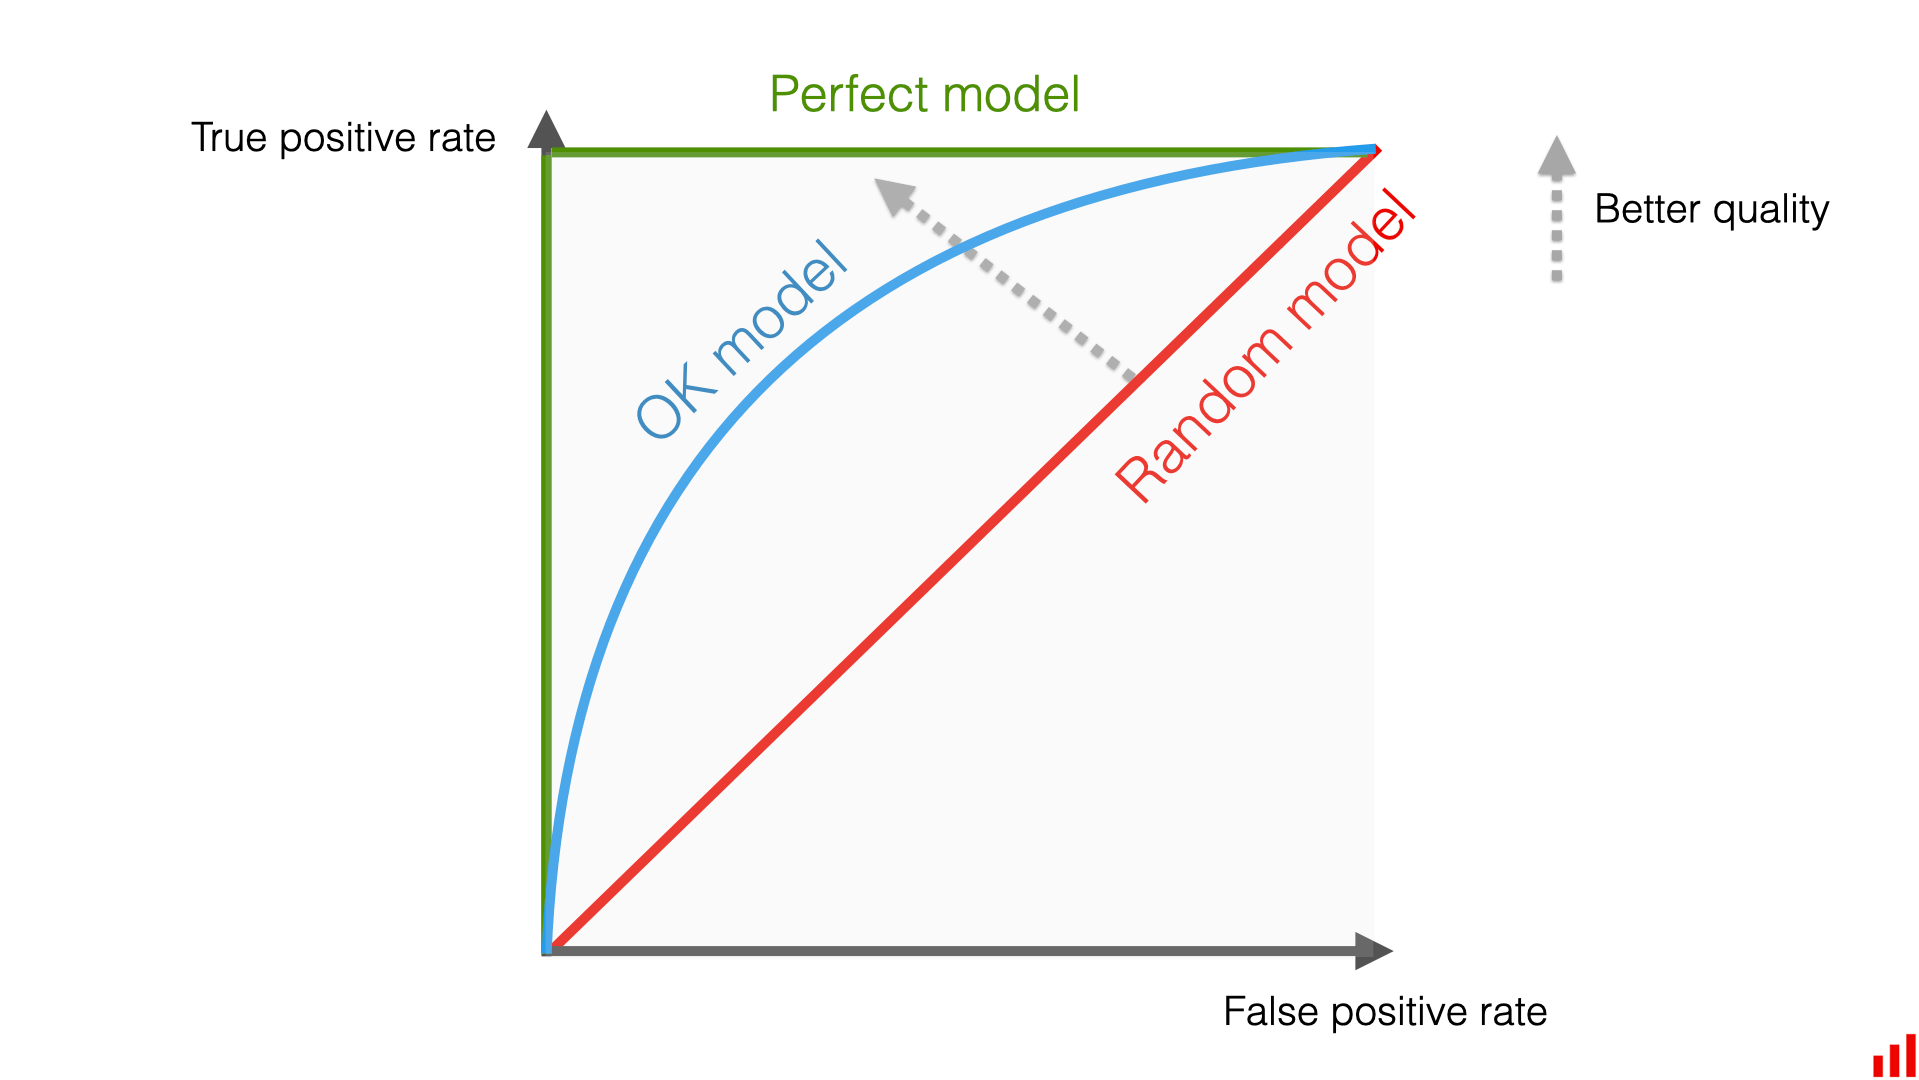

By using one of these ROC curves, one could imagine moving from the right side of the ROC curve to the left as the cutoff which corresponds to increasing the cutoff value. If there is an arbitrarily decided ratio of acceptable change in TPR per change in FPR. Than an ideal cuttoff can be found by evaluating the derivatve of each point in the ROC curve, and stopping when the derivative is smaller than the acceptable ratio.


### B. P-values

P-values are the output of many statistical tests, and they measure the statistical significance of a result or hypothesis. The statistical tests are set up with a null hypothesis ($H_0$) and an alternative hypothesis ($H_A$). A null hypothesis generally states that there is no statistically significant difference or result (depending on the test), and if a p-value is below alpha we can reject the null hypothesis. Alpha is a comparison point for p-values based on the desired confidence, and a common value is 0.05.

One way to measure whether factors correlate with a certain binary result is the two-sample t-test. This test assesses whether the means of two independent samples are statistically different from each other. In this case, the null hypothesis is that the population means are equal, and the alternative hypothesis is that they are different. For this project, t-tests were used by splitting the data into two samples: malignant and benign. From there, each set of factor values (measurements) for each sample were compared using a two sample t-test. This test outputs a p-value, which is a good way to determine whether each factor has a statistically significant impact on the result.

## IV. Implementation

In this section, the teams code and analysis will be run step by step, implementing the math methods outlined above.


#### Libraries

A few libraries are used for this project including:

- Numpy: For array structures
- Pandas: For reading external data
- sklearn: For linear regression model tools
- Scipy: For statistcal tools
- Matplotlib: For data visualization

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
from google.colab import drive
from scipy import stats
import matplotlib.pyplot as plt

Next, data is imported from a personal drive which is then converted to a numpy array for further processing. In order to run the code, please download the data file here: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download

Upload the file to your Google Drive, and if you don't put it in a specific folder, the code below should run for you (once you connect your Google Account). You can also adjust the file path as needed.

In [ ]:
# Mount drive and read csv file
drive.mount('/content/drive')

path = "/content/drive/MyDrive/data.csv"

# Read Data and put in an array
df = np.array(pd.read_csv(path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This has its diagnoses converted from "string" predictions to discrete values of 0 and 1, corresponding to benign and malignant respectively.

In [ ]:
# Convert diagnosis results to 1/0
for i, n in enumerate(df[:,1]):
  if n == 'M':
    df[i,1] = 1
  else:
    df[i,1] = 0

The data was subsequently split into two parts. 75% was fed to the LR model as training data, while the remaining 25% was left to evaluate the models efficacy.

In [ ]:
# Calculate the cutpoint of the DataFrame
cutpoint = 3*df.shape[0] // 4

# Split the DataFrame into two halves
df_train = df[:cutpoint]
df_test = df[cutpoint:]
print(df_train.shape)
print(df_test.shape)

(426, 33)
(143, 33)


A linear regression model is constructed using sklearn's linear_model library. The vector of coefficients developed from this can be seen below.

In [ ]:
# Apply a linear regression model based on the given parameters
reg = linear_model.LinearRegression()
reg.fit(df_train[:,2:32], df_train[:,1])

print(reg.coef_)

[-2.19718433e-01  1.58617039e-02  2.42572192e-02  3.22863389e-04
  1.54203156e+00 -4.63201340e+00  1.09191214e+00  1.42917874e+00
 -3.71073922e-01  3.72859347e+00  4.01053608e-01  9.22806168e-03
 -3.03368408e-02 -1.22149750e-04  1.39197572e+01 -4.76681100e-01
 -3.39551399e+00  1.21069903e+01  4.99902350e-01 -5.96516408e+00
  1.93392780e-01  1.49943249e-03  7.66880569e-04 -1.17386254e-03
  4.59561514e-01  2.41301994e-01  3.71696497e-01  6.47193195e-01
  5.87961139e-01  3.04692028e+00]


One method to evaluate this model is with an $R^2$ score. This score is found through comparing the explainable variation ($u$) versus the total variation ($v$).

$ R^2 = ( 1 - \frac{u}{v}) $

This score will typically range from 0 to 1 with the best possible score being 1.

In [ ]:
# Find the R2 value for the model
score = reg.score(df_train[:,2:32], df_train[:,1])
print("Score of Linear Regression Model: " + str(score))

Score of Linear Regression Model: 0.781016437595215


With a trained model prepared, a prediction can be made on the remaining data. The vector shown below shows the list of continous predictions the model produced.

In [ ]:
# Predict the second half of the data set
prediction = reg.predict(df_test[:,2:32])
print(prediction)

[ 0.05680371  0.24653033 -0.11943071  0.03755466  0.74790613 -0.05241308
  1.00633258  0.95784127  0.26370428  0.77652403  0.2141522   0.29401868
  0.23179988  0.07156478  0.21973387  0.89604012  0.02419483 -0.13418751
  0.49111426  0.37124483  1.06866321  0.25148323  0.36342202  1.02615973
  0.04707326  0.91705172  0.26982384  0.30020686  0.22102581  0.45553576
  0.35443919  0.25463443  0.21140433  0.00927327  1.11474328  1.04996379
  0.2535586   0.1426346   0.24350018  0.43099615  0.36360494  0.01007118
  1.01056312  0.38598734  0.03724531  0.346229    0.29699918  0.2220575
 -0.04554004  0.14827763  0.34871207  0.06269413 -0.01580818  0.57265087
  0.02830362  0.31944444  0.20450064  0.14932696  0.30627471  0.18047187
  0.24732866  1.09734422  0.20244939  0.5654585   0.2877682   0.27888344
  0.79059874 -0.0245232   0.19225052  0.33096469  0.35317569  0.17792563
  0.89477403  0.99609235  0.22264041  0.77592427  0.17135598  1.21396271
 -0.11098169 -0.00586241  0.11726493  0.19465962  0.

To visualize these predictions with the actual diagnois, the two have been plotted together. Note how when predictions are generally high, there are more malignant diagnoses, and vice versa when predictions are low. This is a good indicator the model is performing well.

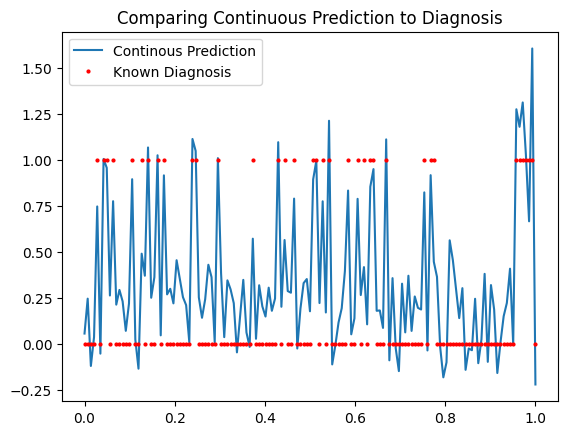

In [ ]:
# Compare predictions to expected results
X = arr = np.linspace(0, 1, num=prediction.shape[0])

plt.figure(1)
plt.plot(X,prediction,X,df_test[:,1],'ro',markersize = 2)
plt.legend(['Continous Prediction', 'Known Diagnosis'])
plt.title('Comparing Continuous Prediction to Diagnosis')
plt.show()

With the predictions made, the next two steps involve converting the data back to discrete predictions of 1 or 0, and then evaluating the number of true positives, false positives, true negatives, and false negatives. This is done in two functions, as different cutoff values will need to be tested, making this procedure more clear and legible. The code below shows both these functions, as well as evaluating the model at a range of cutoffs.

In [ ]:
# Convert the continuous predictions into descrete diagnosis based of a given cutoff value
def cont2discrete(predictions, cutoff):
  tempPred = np.copy(predictions)
  for i, n in enumerate(predictions):
    if n > cutoff:
      tempPred[i] = 1
    else:
      tempPred[i] = 0
  return tempPred

# Evaluate the number of true/false positivse/negatives based on a prediction and given cutoff
def evaluate(prediction, cutoff, data):
  tPred = cont2discrete(prediction, cutoff)
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  for i, n in enumerate(prediction):
    if tPred[i] == 0 and data[i,1] == 0:
      tn += 1
    elif tPred[i] == 1 and data[i,1] == 1:
      tp += 1
    elif tPred[i] == 1 and data[i,1] == 0:
      fp += 1
    elif tPred[i] == 0 and data[i,1] == 1:
      fn += 1
  return [tp,tn,fp,fn]

# Establish range of cutoff values
cutoffs = np.linspace(min(prediction), max(prediction), num=51)
# Create a vector of all tp,tn,fp,fn results for each cutoff
efficacy = np.zeros((cutoffs.shape[0],4))

# Evaluate each cutoff value for its efficacy
for i, n in enumerate(cutoffs):
  efficacy[i] = evaluate(prediction,n,df_test)

leg = [['TP  ', 'TN  ', 'FP  ', 'FN  ']]
print(np.append(leg,efficacy,axis=0))

[['TP  ' 'TN  ' 'FP  ' 'FN  ']
 ['35.0' '1.0' '107.0' '0.0']
 ['35.0' '1.0' '107.0' '0.0']
 ['35.0' '4.0' '104.0' '0.0']
 ['35.0' '8.0' '100.0' '0.0']
 ['35.0' '12.0' '96.0' '0.0']
 ['35.0' '14.0' '94.0' '0.0']
 ['35.0' '23.0' '85.0' '0.0']
 ['35.0' '29.0' '79.0' '0.0']
 ['35.0' '38.0' '70.0' '0.0']
 ['35.0' '40.0' '68.0' '0.0']
 ['35.0' '44.0' '64.0' '0.0']
 ['35.0' '51.0' '57.0' '0.0']
 ['35.0' '61.0' '47.0' '0.0']
 ['35.0' '74.0' '34.0' '0.0']
 ['35.0' '80.0' '28.0' '0.0']
 ['35.0' '88.0' '20.0' '0.0']
 ['35.0' '97.0' '11.0' '0.0']
 ['35.0' '103.0' '5.0' '0.0']
 ['34.0' '105.0' '3.0' '1.0']
 ['33.0' '107.0' '1.0' '2.0']
 ['32.0' '107.0' '1.0' '3.0']
 ['32.0' '107.0' '1.0' '3.0']
 ['30.0' '108.0' '0.0' '5.0']
 ['30.0' '108.0' '0.0' '5.0']
 ['30.0' '108.0' '0.0' '5.0']
 ['29.0' '108.0' '0.0' '6.0']
 ['29.0' '108.0' '0.0' '6.0']
 ['28.0' '108.0' '0.0' '7.0']
 ['24.0' '108.0' '0.0' '11.0']
 ['22.0' '108.0' '0.0' '13.0']
 ['21.0' '108.0' '0.0' '14.0']
 ['19.0' '108.0' '0.0' '16.0']
 ['17

With this information, the true positive and false positive values can be simply plotted against the range of cutoff values. Notably, the false positive and false negatives are directly correlated to the remaining cases not covered by the false and true positives. As such, the graph neglects plotting them.

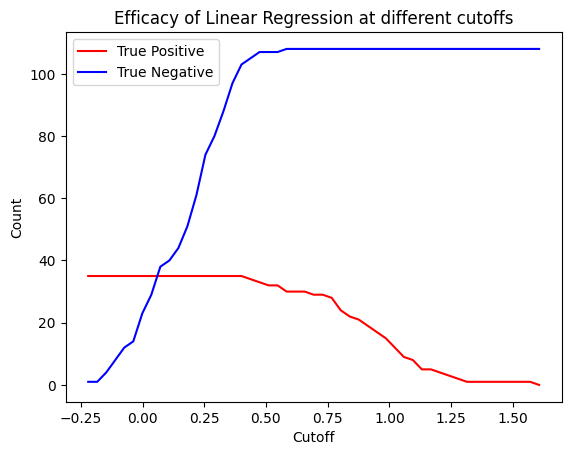

In [ ]:
# Plot the raw true negative and true positive values with respect to cutoff
plt.figure(2)
plt.plot(cutoffs, efficacy[:,0], 'r', cutoffs, efficacy[:,1], 'b',)
plt.legend(['True Positive', 'True Negative'])
plt.title('Efficacy of Linear Regression at different cutoffs')
plt.xlabel('Cutoff')
plt.ylabel('Count')
plt.show()

Now the false positive and true positive rates can be solved for as the ratio of each against the total number of positive cases.

In [ ]:
# Find the false positive and true positive rate
fpr = efficacy[:,2] / (efficacy[:,2] + efficacy[:,1]);
tpr = efficacy[:,0] / (efficacy[:,0] + efficacy[:,3]);

Finally, a allowance ratio of false positive rate to true postive rate is set at 3, represetning 3 false positives gained for 1 false positive lost, as the maximum allowable tradeoff as the program increments along different cutoff values.

In [ ]:
# Ratio of acceptable change in false positives for a change in false negatives
ratio = 3 # An increase of 1 True positive is worth 3 false positives
bp = 0 # A place to store the best performance

# Find the percent change in true positive rates
for i in range(len(fpr) - 1) :
  # Delta in tpr and fpr
  dT = tpr[i+1] - tpr[i]
  dP = fpr[i+1] - fpr[i]

  # Exclude points where one doesnt change and check the ratio in change
  if dT != 0 and dP != 0:
    change = dP / dT
    # First point that yeilds less than allowed, break out
    if change < ratio:
      bp = i
      break
  else:
    change = 0

print("Final Cutoff Value: " + str(cutoffs[bp]))
print("Final False Positive Rate: " + str(fpr[bp]))
print("Final True Positive Rate: " + str(tpr[bp]))

Final Cutoff Value: 0.40107823647285223
Final False Positive Rate: 0.046296296296296294
Final True Positive Rate: 1.0


With this information, an ROC plot can be constructed, which highlights the ideal cutoff ratio for maximum effectiveness.

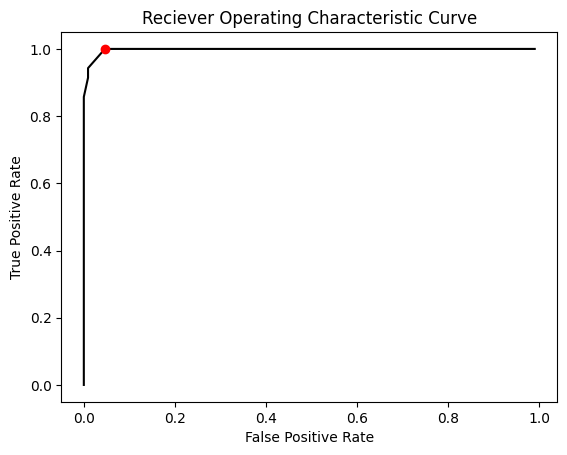

In [ ]:
# Make an ROC plot of true positive rate and false positive rate
plt.figure(3)
plt.plot(fpr, tpr, 'k',fpr[bp],tpr[bp],'ro')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic Curve')
plt.show()

#### P-value Analysis

The goal of this step of the analysis was to use two sample t-tests to determine which features were insignificant to the diagnosis. The first step of this is to separate the data into two samples: malignant and benign.

In [ ]:
#First split the training data into two sets: benign (B) an malignant (M)
df_M = np.zeros((1,df_train.shape[1]))
df_B = np.zeros((1,df_train.shape[1]))
for i, n in enumerate(df_train[:,1]):
  if n == 1:
    newrow = np.array([df_train[i,:]])
    df_M = np.append(df_M,newrow,axis=0)
  elif n == 0:
    newrow = np.array([df_train[i,:]])
    df_B = np.append(df_B,newrow,axis=0)

df_M = np.delete(df_M, (0), axis=0)
df_B = np.delete(df_B, (0), axis=0)
df_M = np.delete(df_M, (-1), axis=1)
df_B = np.delete(df_B, (-1), axis=1)

At this point, the data was still in blocks that included each feature as a separate column. The following code performs a two sample t-test for each feature separately, and calls out which features do not have a statistically significant influence on the diagnosis.

In [ ]:
#Perform 2 sample T-Test for each factor

Pval = []
InsigFacs = []
for i in range(2, (df_M.shape[1]-1)):
  datatempM = np.asarray(df_M[:,i]).astype(np.float64)
  datatempB = np.asarray(df_B[:,i]).astype(np.float64)
  varM = np.var(datatempM)
  varB = np.var(datatempB)
  maxvar = max(varM, varB)
  minvar = min(varM, varB)
  vratio = maxvar/minvar
  if vratio<4:
    res = stats.ttest_ind(datatempM, datatempB, equal_var=True)
  else:
    res = stats.ttest_ind(datatempM, datatempB, equal_var=False)
  Pval.append(res.pvalue)
  if res.pvalue>0.05:
    InsigFacs.append(i)
print(Pval)
print("Insignificant Factors are ", InsigFacs)




[np.float64(1.8559778814826113e-70), np.float64(4.703487369853142e-29), np.float64(4.0942106676439224e-74), np.float64(2.3528470021471274e-43), np.float64(1.0326436723699887e-16), np.float64(5.171069719635946e-43), np.float64(3.619428180704182e-57), np.float64(2.1061783657204813e-58), np.float64(6.455967590666698e-12), np.float64(0.9683770733461593), np.float64(1.8909594220632828e-26), np.float64(0.969692129673047), np.float64(6.358529279747774e-25), np.float64(1.0057256767590874e-24), np.float64(0.2509004801351828), np.float64(8.72284693566834e-09), np.float64(6.850960796803267e-06), np.float64(1.9334084921231065e-16), np.float64(0.701694810992316), np.float64(0.20496163251705116), np.float64(5.262795029941009e-60), np.float64(4.446296593516121e-32), np.float64(1.8843502008465368e-61), np.float64(3.2594413650262133e-46), np.float64(2.4265622892772427e-24), np.float64(5.776885646225892e-43), np.float64(1.4129803344460008e-53), np.float64(6.269964293486444e-95), np.float64(3.39824999792

Based on the results from running the code above, columns 11, 13, 16, 20, and 21 are statistically insignificant. From the data set, these are the Symmetry Mean, Radius Standard Error, Area Standard Error, Concave Points Standard Error, and Symmetry Standard Error.

The code below shows the process of removing these insignificant features, and then repeating the steps from the first half of implementation. This includes applying a linear regression model and finding the corresponding $R^2$ value.

In [ ]:
#Try a new model without the insignificant factors
p_train = np.delete(df_train, InsigFacs, axis=1)
p_test = np.delete(df_test, InsigFacs, axis=1)


# Apply a linear regression model based on the given parameters
reg = linear_model.LinearRegression()
reg.fit(p_train[:,2:27], p_train[:,1])

print(reg.coef_)

# Find the R2 value for the model
p_score = reg.score(p_train[:,2:27], p_train[:,1])
print("Score of Linear Regression Model:" + str(p_score))

[-2.02303441e-01  1.77978004e-02  2.04213547e-02  4.48921431e-04
  1.36160463e+00 -4.39296269e+00  1.50737026e+00  1.24763742e+00
 -3.86843061e-01  4.46689966e-01 -2.58369344e-02 -4.72774188e-04
  5.61243313e-01 -4.08422280e+00  1.52869804e+01  1.78786279e-01
  7.68531456e-04  5.92514877e-04 -1.10679813e-03  2.08758646e+00
  1.42471778e-01  3.36380350e-01  2.42370762e-01  6.63973413e-01
  2.98017033e+00]
Score of Linear Regression Model:0.7783010896160618


Similarly to before, the next step was to use this linear model to predict the diagnosis of the testing portion of the data.

In [ ]:
# Predict the second half of the data set
p_prediction = reg.predict(p_test[:,2:27])
print(p_prediction)

[ 0.05578935  0.27053154 -0.1317286   0.02247838  0.74673487 -0.07155871
  1.01122807  0.94282817  0.26851956  0.76699611  0.21265813  0.26596441
  0.21919845  0.07466612  0.20334972  0.89735381  0.01201196 -0.16920731
  0.4809996   0.35615461  1.05514458  0.24937318  0.35052168  1.00207993
  0.05095375  0.88978387  0.27205946  0.31157382  0.23359165  0.45592974
  0.33630947  0.27833847  0.23253564  0.02108261  1.11612506  1.15167088
  0.25764901  0.16468014  0.25269497  0.43921471  0.37126086 -0.0048974
  1.02306162  0.34203943  0.05428606  0.35877093  0.28147947  0.17265752
 -0.02079866  0.16186494  0.34670048  0.05663444  0.00173621  0.57253065
  0.02277126  0.31558112  0.20332451  0.16556948  0.30578987  0.20899628
  0.25466504  1.09657717  0.20889037  0.56014376  0.29770719  0.25816227
  0.77036282 -0.09555529  0.164821    0.33037411  0.36075282  0.18618761
  0.86159161  0.99027215  0.19883363  0.81078113  0.16415757  1.22046848
 -0.03291231 -0.12051834  0.1306675   0.16190815  0.

Below is a graph showing the continuous prediction values in blue compared to the actual diagnoses in red.

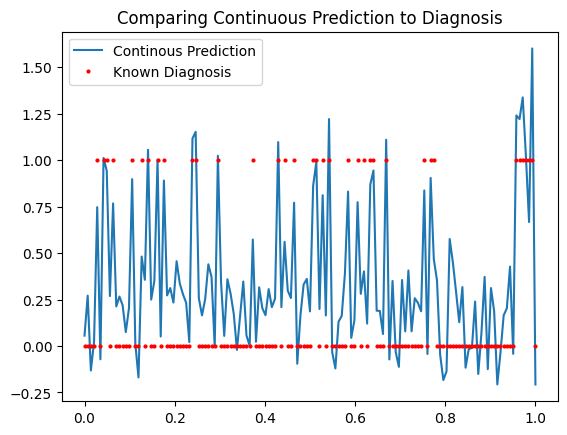

In [ ]:
# Compare predictions to expected results
X = arr = np.linspace(0, 1, num=prediction.shape[0])

plt.figure(4)
plt.plot(X,p_prediction,X,p_test[:,1],'ro',markersize = 2)
plt.legend(['Continous Prediction', 'Known Diagnosis'])
plt.title('Comparing Continuous Prediction to Diagnosis')
plt.show()

Finally, the code below uses the ideal cutoff point determined earlier to make binary predictions for each specimen. It finds the false positive and true positive rates at this point.

In [ ]:
#Assess Efficacy

p_efficacy = evaluate(p_prediction,cutoffs[bp],p_test)
print(p_efficacy)

# Find the false positive and true positive rate
p_fpr = p_efficacy[2] / (p_efficacy[2] + p_efficacy[1]);
p_tpr = p_efficacy[0] / (p_efficacy[0] + p_efficacy[3]);
print("Final False Positive Rate: " + str(p_fpr))
print("Final True Positive Rate: " + str(p_tpr))

[35, 102, 6, 0]
Final False Positive Rate: 0.05555555555555555
Final True Positive Rate: 1.0


## V. Data

The data used for this project comes from the diagnostic Wisconsin Breast Cancer Database. It contains features measured from a digital image of a fine needle aspirate (FNA) of a breast mass. The features include diagnosis, radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

## V. Results

## Linear Regression and Cutoff Analysis
As can be seen from the analyses performed above, the use of a multiple linear regression model shows promising results when it comes to diagnosing breast cancer based on fine needle aspirate data. By training this model through the linear regression library in sklearn, an $R^2$ score of .78 was achieved, showing the system was able to accurately model the majority of the datasets variance. Following this, a range of cutoff values were analyzed using an ROC plot which held extremely close to an ideal model, with a very distinct “best” cutoff point. This cutoff was then derived as 0.41, which could distinguish all positive cases, whilst falsely reporting only ~5% of negative cases as positive. This results in a 100% specificity, and a 95% sensitivity, outclassing the 98% and 85% benchmark of previous methods.

## P-Values
The P-value analysis ultimately showed that 5 of the 30 dataset features were not statistically significant in predicting a diagnosis. These were the Symmetry Mean, Radius Standard Error, Area Standard Error, Concave Points Standard Error, and Symmetry Standard Error. With these features removed, the model still acheived an $R^2$ score of .78, as well as 100% specificity and 95% sensitivity. This demonstrates that future uses of this method may not require professionals to take those extra measurements.

This model is highly successful, but an area for further exploration is reducing the number of features further and comparing the efficacies. The less measurements are required, the more efficient and simple the diagnostic process will be. There may be a set of features that optimizes the performance compared to the up-front effort.

## Future Work
A wide variety of steps can be taken to move this technique forward. Firstly, the model can and should be checked against additional data and measurements of fine needle aspirate data. This will provide increased variance in the input data, which may be detrimental to the models performance. Additionally, as the goal of this model is to decrease human intervention and analysis time, it would be ideal for a secondary program to be developed which can perform all the measurements automatically, instead of requiring a human to analyze the images.

# References

Casaubon, J. T. (2023, July 23). *Fine needle aspiration of breast masses.*   StatPearls [Internet]. https://www.ncbi.nlm.nih.gov/books/NBK470268/

Sizilio, G. R., Leite, C. R., Guerreiro, A. M., & Neto, A. D. D. (2012, November 2). *Fuzzy method for pre-diagnosis of breast cancer from the fine needle aspirate analysis - biomedical engineering online.* BioMedical Engineering Online. https://biomedical-engineering-online.biomedcentral.com/articles/10.1186/1475-925X-11-83

Tsochatzidis, L., Costaridou, L., & Pratikakis, I. (2019). *Deep learning for breast cancer diagnosis from mammograms—a comparative study.* Journal of Imaging, 5(3), 37. https://doi.org/10.3390/jimaging5030037

How to explain the ROC AUC score and ROC curve? (n.d.). https://www.evidentlyai.com/classification-metrics/explain-roc-curve

Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.